In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc
import warnings

In [20]:
pd.set_option('max_rows', 5)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 4
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('ex2data2.txt', 
                   names=['Test1', 'Test2', 'Acceptance'])
data.head()

,Test1,Test2,Acceptance
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Test1         118 non-null float64
Test2         118 non-null float64
Acceptance    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [5]:
data.describe()

,Test1,Test2,Acceptance
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
...,...,...,...
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


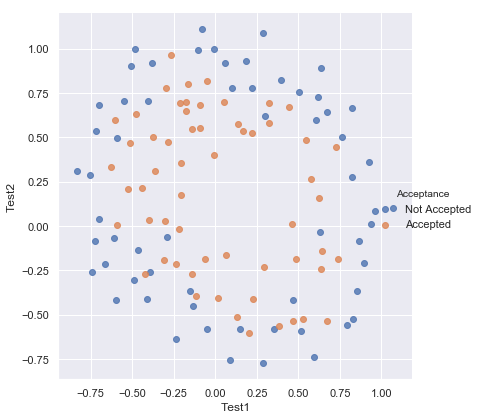

In [21]:
def drawChart():
    vis1 = sns.lmplot(data=data, x = 'Test1', y = 'Test2',
                     hue='Acceptance', fit_reg=False, size=6,
                     legend_out=True)
    #set legend titles
    new_labels = ['Not Accepted', 'Accepted']
    for t, l in zip(vis1._legend.texts, new_labels): t.set_text(l)
    

drawChart()

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X

,Test1,Test2
0,0.051267,0.699560
1,-0.092742,0.684940
...,...,...
116,-0.006336,0.999270
117,0.632650,-0.030612


In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [31]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:, np.newaxis]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
            
    return out

In [10]:
X = mapFeature(data.iloc[:, 0], data.iloc[:, 1])
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [11]:
def costFunction(theta, X, y, m, lmbda):
    #lmbda == regularization parameter
    J = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) +
                 (1 - y.T) @ np.log(1 - sigmoid(X @ theta))) 
        
    regularization = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
    return J + regularization

In [12]:
def gradient(theta, X, y, m, lmbda):
    grad = np.zeros([m, 1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad [1:] = grad[1:] + (lmbda / m) * theta[1:]
    return grad

In [13]:
m, n = X.shape
y = y[:, np.newaxis]
theta = np.zeros((n, 1))
lmbda = 1
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [14]:
#expected cost 0.693
J = costFunction(theta, X, y, m, lmbda)
J

array([[0.69314718]])

In [15]:
#Unfortunately scipy’s fmin_tnc 
#doesn’t work well with column or row vector. 
#It expects the parameters to be in an array format. 
#The flatten() function reduces a column 
#or row vector into array format.
arr = fmin_tnc(func=costFunction,
              x0=theta.flatten(),
              fprime=gradient,
              args=(X, y.flatten(), m, lmbda))
arr

(array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
        -1.45817009, -0.05098418, -0.61558556, -0.27469165, -1.19271299,
        -0.24217841, -0.20603301, -0.04466178, -0.27778949, -0.29539514,
        -0.45645982, -1.04319154,  0.02779373, -0.29244867,  0.0155576 ,
        -0.32742404, -0.1438915 , -0.92467488]), 32, 1)

In [16]:
theta_optimized = arr[0]
theta_optimized

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558556, -0.27469165, -1.19271299,
       -0.24217841, -0.20603301, -0.04466178, -0.27778949, -0.29539514,
       -0.45645982, -1.04319154,  0.02779373, -0.29244867,  0.0155576 ,
       -0.32742404, -0.1438915 , -0.92467488])

In [17]:
#accuracy
pred = [sigmoid(np.dot(X, theta_optimized)) >= 0.5]
np.mean(pred == y.flatten()) * 100

83.05084745762711

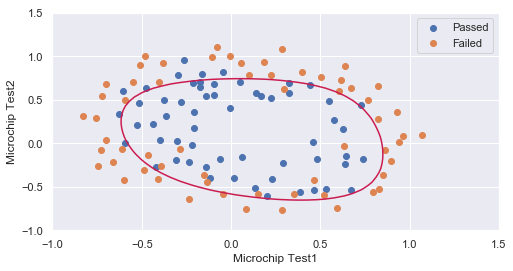

In [98]:
#draw decision boundary
SIZE = 50
u = np.linspace(-1, 1.5)
v = np.linspace(-1, 1.5)
z = np.zeros((SIZE, SIZE))

def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, 
                             np.multiply(np.power(X1, i-j), 
                                         np.power(X2, j))))
    return out


for i in range(SIZE):
    for j in range(SIZE):
        z[i, j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta_optimized)
 

mask = y.flatten() == 1
X = data.iloc[:,:-1]
X[mask].iloc[:, 0]
passed = plt.scatter(X[mask].iloc[:, 0], X[mask].iloc[:, 1])
failed = plt.scatter(X[~mask].iloc[:, 0], X[~mask].iloc[:, 1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()